`imdb_week_10.ipynb` shoud contain the output for all function calls with the arguments below:
* for `get_movies_by_actor_soup`:
    * actor Dwayne Johnson https://www.imdb.com/name/nm0425005/
    * actor Dwayne Johnson https://www.imdb.com/name/nm0425005/, num_of_movies_limit=100
    * actor Dwayne Johnson https://www.imdb.com/name/nm0425005/, num_of_movies_limit=5
    * actress Scarlett Johansson https://www.imdb.com/name/nm0424060/
    * actress Scarlett Johansson https://www.imdb.com/name/nm0424060/, num_of_movies_limit=100
    * actress Scarlett Johansson https://www.imdb.com/name/nm0424060/, num_of_movies_limit=5
* for `get_actors_by_movie_soup`:
    * movie "Black Widow" https://www.imdb.com/title/tt3480822/fullcredits/
    * movie "Black Widow" https://www.imdb.com/title/tt3480822/fullcredits/, num_of_movies_limit=150
    * movie "Black Widow" https://www.imdb.com/title/tt3480822/fullcredits/, num_of_movies_limit=5 

In [1]:
from imdb_helper_functions import get_soup
from imdb_helper_functions import print_wordclouds
from imdb_helper_functions import get_soup_txt
from imdb_helper_functions import save_descriptions
from imdb_helper_functions import check_local_file
from imdb_helper_functions import print_wordclouds
from imdb_helper_functions import get_proper_url
from imdb_helper_functions import send_request
from imdb_helper_functions import read_json
from imdb_helper_functions import write_to_csv

from imdb_code import get_movies_by_actor_soup
from imdb_code import get_actors_by_movie_soup
from imdb_code import get_movie_distance
from imdb_code import get_movie_descriptions_by_actor_soup

import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from tqdm import tqdm
from collections import defaultdict
import json
from itertools import permutations
from copy import deepcopy
from networkx import astar_path
import networkx as nx
import os


# WEEK 10

### Test of the function `get_movies_by_actor_soup` 
#### Actor Dwayne Johnson https://www.imdb.com/name/nm0425005/

In [2]:
url = 'https://www.imdb.com/name/nm0425005/'
url = get_proper_url(url)
file = url.split('/', maxsplit=5)[4]
path_txt = f'C:/Users/DL/PycharmProjects/3rd_sem/Data_Scraping/W11_Project_Demo_02/data/txt/{file}.txt'
actor_page_soup = get_soup_txt(path_txt)

In [3]:
result = get_movies_by_actor_soup(actor_page_soup)

print(f'Number of Feature Films: {len(result)};\n\n'
      f'List of Feature Films:\n\n{result}')

Number of Feature Films: 45;

List of Feature Films:

[('Black Adam', 'https://www.imdb.com/title/tt6443346/fullcredits/'), ('DC League of Super-Pets', 'https://www.imdb.com/title/tt8912936/fullcredits/'), ('Red Notice', 'https://www.imdb.com/title/tt7991608/fullcredits/'), ('Free Guy', 'https://www.imdb.com/title/tt6264654/fullcredits/'), ('Jungle Cruise', 'https://www.imdb.com/title/tt0870154/fullcredits/'), ('Jumanji: The Next Level', 'https://www.imdb.com/title/tt7975244/fullcredits/'), ('Fast & Furious Presents: Hobbs & Shaw', 'https://www.imdb.com/title/tt6806448/fullcredits/'), ('Fighting with My Family', 'https://www.imdb.com/title/tt6513120/fullcredits/'), ('Skyscraper', 'https://www.imdb.com/title/tt5758778/fullcredits/'), ('Rampage', 'https://www.imdb.com/title/tt2231461/fullcredits/'), ('Jumanji: Welcome to the Jungle', 'https://www.imdb.com/title/tt2283362/fullcredits/'), ('Baywatch', 'https://www.imdb.com/title/tt1469304/fullcredits/'), ('The Fate of the Furious', 'https:

In [4]:
result = get_movies_by_actor_soup(actor_page_soup, num_of_movies_limit=100)

print(f'Number of Feature Films: {len(result)};\n\n'
      f'List of Feature Films:\n\n{result}')

Number of Feature Films: 45;

List of Feature Films:

[('Black Adam', 'https://www.imdb.com/title/tt6443346/fullcredits/'), ('DC League of Super-Pets', 'https://www.imdb.com/title/tt8912936/fullcredits/'), ('Red Notice', 'https://www.imdb.com/title/tt7991608/fullcredits/'), ('Free Guy', 'https://www.imdb.com/title/tt6264654/fullcredits/'), ('Jungle Cruise', 'https://www.imdb.com/title/tt0870154/fullcredits/'), ('Jumanji: The Next Level', 'https://www.imdb.com/title/tt7975244/fullcredits/'), ('Fast & Furious Presents: Hobbs & Shaw', 'https://www.imdb.com/title/tt6806448/fullcredits/'), ('Fighting with My Family', 'https://www.imdb.com/title/tt6513120/fullcredits/'), ('Skyscraper', 'https://www.imdb.com/title/tt5758778/fullcredits/'), ('Rampage', 'https://www.imdb.com/title/tt2231461/fullcredits/'), ('Jumanji: Welcome to the Jungle', 'https://www.imdb.com/title/tt2283362/fullcredits/'), ('Baywatch', 'https://www.imdb.com/title/tt1469304/fullcredits/'), ('The Fate of the Furious', 'https:

In [5]:
result = get_movies_by_actor_soup(actor_page_soup, num_of_movies_limit=5)
 
print(f'Number of Feature Films: {len(result)};\n\n'
      f'List of Feature Films:\n\n{result}')

Number of Feature Films: 5;

List of Feature Films:

[('Black Adam', 'https://www.imdb.com/title/tt6443346/fullcredits/'), ('DC League of Super-Pets', 'https://www.imdb.com/title/tt8912936/fullcredits/'), ('Red Notice', 'https://www.imdb.com/title/tt7991608/fullcredits/'), ('Free Guy', 'https://www.imdb.com/title/tt6264654/fullcredits/'), ('Jungle Cruise', 'https://www.imdb.com/title/tt0870154/fullcredits/')]


#### Actress Scarlett Johansson https://www.imdb.com/name/nm0424060/

In [6]:
url = 'https://www.imdb.com/name/nm0424060/'
url = get_proper_url(url)
file = url.split('/', maxsplit=5)[4]
path_txt = f'C:/Users/DL/PycharmProjects/3rd_sem/Data_Scraping/W11_Project_Demo_02/data/txt/{file}.txt'
actor_page_soup = get_soup_txt(path_txt)

In [7]:
result = get_movies_by_actor_soup(actor_page_soup)

print(f'Number of Feature Films: {len(result)};\n\n'
      f'List of Feature Films:\n\n{result}')

Number of Feature Films: 54;

List of Feature Films:

[('Sing 2', 'https://www.imdb.com/title/tt6467266/fullcredits/'), ('Black Widow', 'https://www.imdb.com/title/tt3480822/fullcredits/'), ('Jojo Rabbit', 'https://www.imdb.com/title/tt2584384/fullcredits/'), ('Marriage Story', 'https://www.imdb.com/title/tt7653254/fullcredits/'), ('Avengers: Endgame', 'https://www.imdb.com/title/tt4154796/fullcredits/'), ('Captain Marvel', 'https://www.imdb.com/title/tt4154664/fullcredits/'), ('Avengers: Infinity War', 'https://www.imdb.com/title/tt4154756/fullcredits/'), ('Isle of Dogs', 'https://www.imdb.com/title/tt5104604/fullcredits/'), ('Rough Night', 'https://www.imdb.com/title/tt4799050/fullcredits/'), ('Ghost in the Shell', 'https://www.imdb.com/title/tt1219827/fullcredits/'), ('Sing', 'https://www.imdb.com/title/tt3470600/fullcredits/'), ('Captain America: Civil War', 'https://www.imdb.com/title/tt3498820/fullcredits/'), ('The Jungle Book', 'https://www.imdb.com/title/tt3040964/fullcredits/'

In [8]:
result = get_movies_by_actor_soup(actor_page_soup, num_of_movies_limit=100)

print(f'Number of Feature Films: {len(result)};\n\n'
      f'List of Feature Films:\n\n{result}')

Number of Feature Films: 54;

List of Feature Films:

[('Sing 2', 'https://www.imdb.com/title/tt6467266/fullcredits/'), ('Black Widow', 'https://www.imdb.com/title/tt3480822/fullcredits/'), ('Jojo Rabbit', 'https://www.imdb.com/title/tt2584384/fullcredits/'), ('Marriage Story', 'https://www.imdb.com/title/tt7653254/fullcredits/'), ('Avengers: Endgame', 'https://www.imdb.com/title/tt4154796/fullcredits/'), ('Captain Marvel', 'https://www.imdb.com/title/tt4154664/fullcredits/'), ('Avengers: Infinity War', 'https://www.imdb.com/title/tt4154756/fullcredits/'), ('Isle of Dogs', 'https://www.imdb.com/title/tt5104604/fullcredits/'), ('Rough Night', 'https://www.imdb.com/title/tt4799050/fullcredits/'), ('Ghost in the Shell', 'https://www.imdb.com/title/tt1219827/fullcredits/'), ('Sing', 'https://www.imdb.com/title/tt3470600/fullcredits/'), ('Captain America: Civil War', 'https://www.imdb.com/title/tt3498820/fullcredits/'), ('The Jungle Book', 'https://www.imdb.com/title/tt3040964/fullcredits/'

In [9]:
result = get_movies_by_actor_soup(actor_page_soup, num_of_movies_limit=5)
 
print(f'Number of Feature Films: {len(result)};\n\n'
      f'List of Feature Films:\n\n{result}')

Number of Feature Films: 5;

List of Feature Films:

[('Sing 2', 'https://www.imdb.com/title/tt6467266/fullcredits/'), ('Black Widow', 'https://www.imdb.com/title/tt3480822/fullcredits/'), ('Jojo Rabbit', 'https://www.imdb.com/title/tt2584384/fullcredits/'), ('Marriage Story', 'https://www.imdb.com/title/tt7653254/fullcredits/'), ('Avengers: Endgame', 'https://www.imdb.com/title/tt4154796/fullcredits/')]


### Test of the function `get_actors_by_movie_soup` 
#### Movie "Black Widow" https://www.imdb.com/title/tt3480822/fullcredits/

In [10]:
url = 'https://www.imdb.com/title/tt3480822/fullcredits/'
url = get_proper_url(url)
file = url.split('/', maxsplit=5)[4]
path_txt = f'C:/Users/DL/PycharmProjects/3rd_sem/Data_Scraping/W11_Project_Demo_02/data/txt/{file}.txt'
cast_page_soup = get_soup_txt(path_txt)

In [11]:
result = get_actors_by_movie_soup(cast_page_soup)
 
print(f'Number of actors: {len(result)};\n\n'
      f'List of actors:\n\n{result}')

Number of actors: 106;

List of actors:

[('Scarlett Johansson', 'https://www.imdb.com/name/nm0424060/fullcredits/'), ('Florence Pugh', 'https://www.imdb.com/name/nm6073955/fullcredits/'), ('Rachel Weisz', 'https://www.imdb.com/name/nm0001838/fullcredits/'), ('David Harbour', 'https://www.imdb.com/name/nm1092086/fullcredits/'), ('Ray Winstone', 'https://www.imdb.com/name/nm0935653/fullcredits/'), ('Ever Anderson', 'https://www.imdb.com/name/nm8349839/fullcredits/'), ('Violet McGraw', 'https://www.imdb.com/name/nm8627157/fullcredits/'), ('O-T Fagbenle', 'https://www.imdb.com/name/nm1282966/fullcredits/'), ('William Hurt', 'https://www.imdb.com/name/nm0000458/fullcredits/'), ('Olga Kurylenko', 'https://www.imdb.com/name/nm1385871/fullcredits/'), ('Ryan Kiera Armstrong', 'https://www.imdb.com/name/nm8740834/fullcredits/'), ('Liani Samuel', 'https://www.imdb.com/name/nm9384191/fullcredits/'), ('Michelle Lee', 'https://www.imdb.com/name/nm1685477/fullcredits/'), ('Lewis Young', 'https://www

In [12]:
result = get_actors_by_movie_soup(cast_page_soup, num_of_actors_limit=100)
 
print(f'Number of actors: {len(result)};\n\n'
      f'List of actors:\n\n{result}')

Number of actors: 100;

List of actors:

[('Scarlett Johansson', 'https://www.imdb.com/name/nm0424060/fullcredits/'), ('Florence Pugh', 'https://www.imdb.com/name/nm6073955/fullcredits/'), ('Rachel Weisz', 'https://www.imdb.com/name/nm0001838/fullcredits/'), ('David Harbour', 'https://www.imdb.com/name/nm1092086/fullcredits/'), ('Ray Winstone', 'https://www.imdb.com/name/nm0935653/fullcredits/'), ('Ever Anderson', 'https://www.imdb.com/name/nm8349839/fullcredits/'), ('Violet McGraw', 'https://www.imdb.com/name/nm8627157/fullcredits/'), ('O-T Fagbenle', 'https://www.imdb.com/name/nm1282966/fullcredits/'), ('William Hurt', 'https://www.imdb.com/name/nm0000458/fullcredits/'), ('Olga Kurylenko', 'https://www.imdb.com/name/nm1385871/fullcredits/'), ('Ryan Kiera Armstrong', 'https://www.imdb.com/name/nm8740834/fullcredits/'), ('Liani Samuel', 'https://www.imdb.com/name/nm9384191/fullcredits/'), ('Michelle Lee', 'https://www.imdb.com/name/nm1685477/fullcredits/'), ('Lewis Young', 'https://www

In [13]:
result = get_actors_by_movie_soup(cast_page_soup, num_of_actors_limit=5)
 
print(f'Number of actors: {len(result)};\n\n'
      f'List of actors:\n\n{result}')

Number of actors: 5;

List of actors:

[('Scarlett Johansson', 'https://www.imdb.com/name/nm0424060/fullcredits/'), ('Florence Pugh', 'https://www.imdb.com/name/nm6073955/fullcredits/'), ('Rachel Weisz', 'https://www.imdb.com/name/nm0001838/fullcredits/'), ('David Harbour', 'https://www.imdb.com/name/nm1092086/fullcredits/'), ('Ray Winstone', 'https://www.imdb.com/name/nm0935653/fullcredits/')]


# WEEK 11

### Data collection

In [14]:
# highest-paid actors 2019

urls = ['https://www.imdb.com/name/nm0425005/',
        'https://www.imdb.com/name/nm1165110/',
        'https://www.imdb.com/name/nm0000375/',
        'https://www.imdb.com/name/nm0474774/',
        'https://www.imdb.com/name/nm0000329/',
        'https://www.imdb.com/name/nm0177896/',
        'https://www.imdb.com/name/nm0001191/',
        'https://www.imdb.com/name/nm0424060/',
        'https://www.imdb.com/name/nm0005527/',
        'https://www.imdb.com/name/nm0262635/']

names = ['Dwayne Johnson',
         'Chris Hemsworth',
         'Robert Downey Jr.',
         'Akshay Kumar',
         'Jackie Chan',
         'Bradley Cooper',
         'Adam Sandler',
        'Scarlett Johansson',
        'Sofía Vergara',
        'Chris Evans']

In [15]:
# correct urls if www or 'fullcredits/' or '/' are missing

urls = [get_proper_url(url) for url in urls]

In [16]:
# prepare name_link and link_name dictionaries

name_link = defaultdict()
link_name = defaultdict()
for i in tqdm(range(len(names))):
    name_link[names[i]] = urls[i] 
    link_name[urls[i]] = names[i]

100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


In [20]:
# simple check of the function get_movie_distance
# please NOTE that initially data were collected for max distance of 5

distance = get_movie_distance(urls[1], urls[5], num_of_actors_limit=6, num_of_movies_limit=6)
assert distance == 3
assert type(distance) == int

In [21]:
# getting permutations (start, end) and (end, start) for each actor. So 90 pairs in total

start_end_urls = [(start_end_url) for start_end_url in permutations(urls, 2)]
assert len(start_end_urls) == 90

### Calculation of movies distances between all highest-paid actors

In [23]:
# obtaining distances.csv for each combination in start_end_urls
# please NOTE that delimiter in csv is ;

path_csv = 'C:/Users/DL/PycharmProjects/3rd_sem/Data_Scraping/' + \
           f'W11_Project_Demo_02/data/csv/distances.csv'

# delete file distances.csv to obtain a new one
if check_local_file(path_csv):
    os.remove(path_csv)
    
for i in tqdm(range(len(start_end_urls))):    
    start_url, end_url = start_end_urls[i]
    distance = get_movie_distance(start_url,
                                  end_url,
                                  num_of_actors_limit=6,
                                  num_of_movies_limit=6)
    write_to_csv(path_csv,
                 link_name[start_url],
                 start_url,
                 link_name[end_url],
                 end_url,
                 distance)    

100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [00:59<00:00,  1.52it/s]


### Visualising data

In [24]:
# getting graph

all_paths = []

path_json_graph = 'C:/Users/DL/PycharmProjects/3rd_sem/Data_Scraping/' + \
           f'W11_Project_Demo_02/data/json/graph.json'

graph = read_json(path_json_graph)
graph = nx.DiGraph(graph)
for i in tqdm(range(len(start_end_urls))):
    start_url, end_url = start_end_urls[i]
    shortest_path = astar_path(graph, start_url, end_url)
    all_paths.append(shortest_path)
assert len(all_paths) == len(start_end_urls)

100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [00:02<00:00, 37.21it/s]


In [25]:
# getting edges 

edges = []
edges_labels = defaultdict()

for i in tqdm(range(len(all_paths))):
    start_node = link_name[all_paths[i][0]]
    end_node = link_name[all_paths[i][-1]]
    distance = len(all_paths[i]) // 2
    edge = (start_node, end_node)
    edges.append(edge)
    edges_labels[edge] = distance

100%|██████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 155857.70it/s]


In [27]:
# getting colors for each edge distance
edge_color=edges_labels.values()
distances = tuple(edge_color)

# palette for distance 1 color is red and so on
color = ['red', 'green', 'blue', 'orange', 'lime']

colors = []
for distance in distances:
    colors.append(color[distance-1])

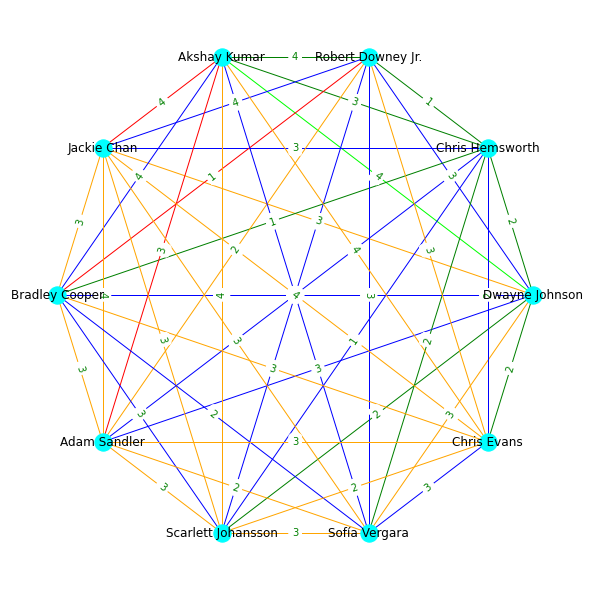

In [31]:
# a whole graph

G = nx.Graph()
G.add_edges_from(edges)
pos = nx.circular_layout(G)
plt.figure(figsize=(8, 8))
nx.draw_circular(G, node_color='cyan', labels={node: node for node in G.nodes()}, edge_color=colors)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edges_labels,
                             font_color='green')
plt.axis('off')
plt.show()

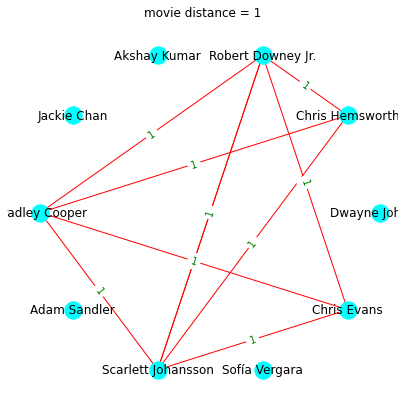

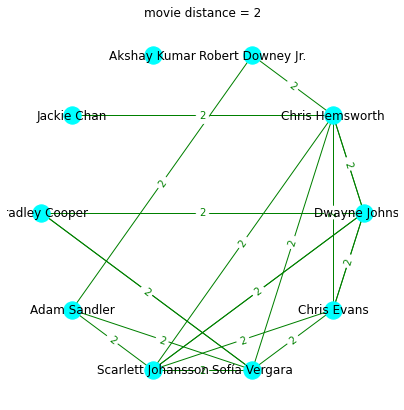

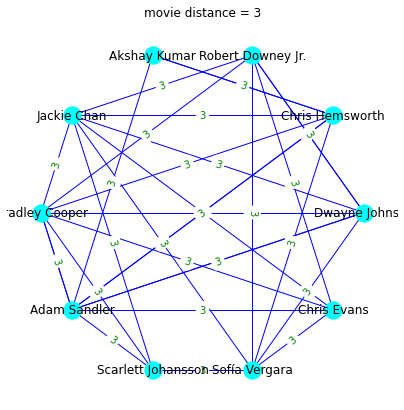

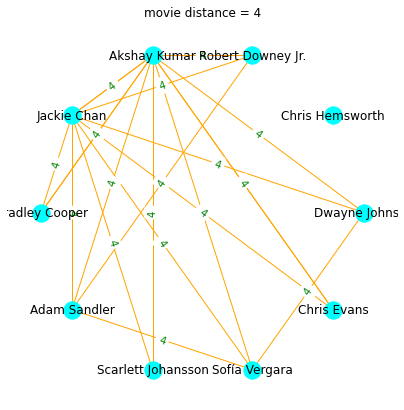

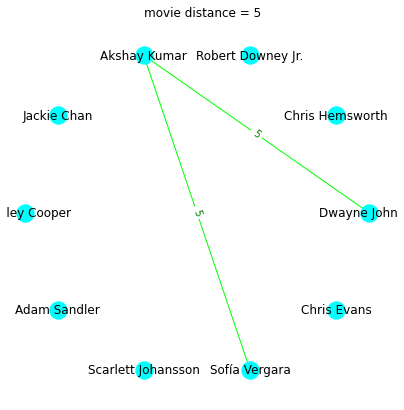

In [32]:
# subgraphs for different movie distances

distances = sorted(list(set(distances)))

for distance in distances:
    edges_d = [key for key, value in edges_labels.items() if value == distance]
    edges_d_labels = defaultdict() 
    for edge in edges_d:
        edges_d_labels[edge] = distance

    pos = nx.circular_layout(G)
    plt.figure(figsize=(7, 7))
    
    nx.draw_networkx_nodes(G, pos, node_color='cyan')
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, edgelist=edges_d, width=1, edge_color=color[distance-1]);
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edges_d_labels, font_color='green')
    plt.axis('off')
    plt.title(f'movie distance = {distance}')
    plt.show()

# WEEK 12

In [37]:
# assumming that weeks are independent, some lines of code in Week 12 could be the same as in Week 11
# highest-paid actors 2019

urls = ['https://www.imdb.com/name/nm0425005/',
        'https://www.imdb.com/name/nm1165110/',
        'https://www.imdb.com/name/nm0000375/',
        'https://www.imdb.com/name/nm0474774/',
        'https://www.imdb.com/name/nm0000329/',
        'https://www.imdb.com/name/nm0177896/',
        'https://www.imdb.com/name/nm0001191/',
        'https://www.imdb.com/name/nm0424060/',
        'https://www.imdb.com/name/nm0005527/',
        'https://www.imdb.com/name/nm0262635/']

names = ['Dwayne Johnson',
         'Chris Hemsworth',
         'Robert Downey Jr.',
         'Akshay Kumar',
         'Jackie Chan',
         'Bradley Cooper',
         'Adam Sandler',
        'Scarlett Johansson',
        'Sofía Vergara',
        'Chris Evans']

In [38]:
# correct urls if www or 'fullcredits/' or '/' are missing

urls = [get_proper_url(url) for url in urls]

In [39]:
# prepare name_link and link_name dictionaries

name_link = defaultdict()
link_name = defaultdict()
for i in tqdm(range(len(names))):
    name_link[names[i]] = urls[i] 
    link_name[urls[i]] = names[i]

100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


In [43]:
for i in tqdm(range(len(urls))):
    url = get_proper_url(urls[i], suffix=True)
#     print(url)
    file = f"{url.split('/', maxsplit=5)[4]}.txt"
    
    path_common = 'C:/Users/DL/PycharmProjects/3rd_sem/Data_Scraping/W11_Project_Demo_02/data/'
    path_soup = path_common + 'txt/' + file
    
    actor_soup = get_soup_txt(path_soup)
    actor_name = actor_soup.\
                    title.text.split(' - ')[0]   
    
    path_description = path_common + 'descr/' + f'{actor_name}.txt'    
    
    if not check_local_file(path_description):
        descriptions = get_movie_descriptions_by_actor_soup(actor_soup)
        save_descriptions(descriptions)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.48it/s]


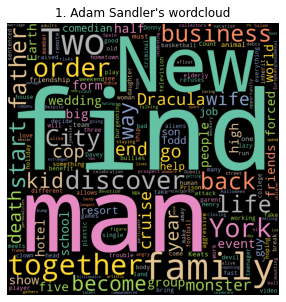

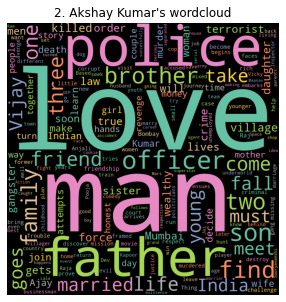

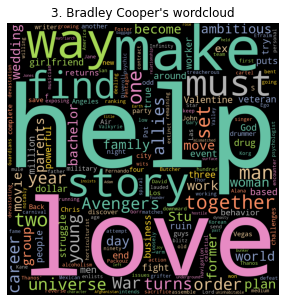

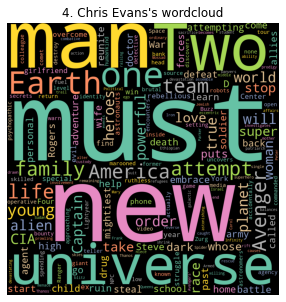

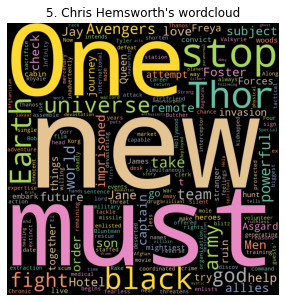

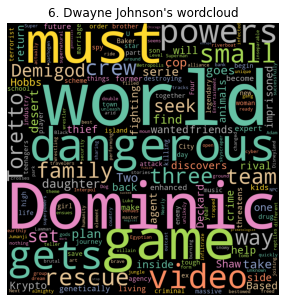

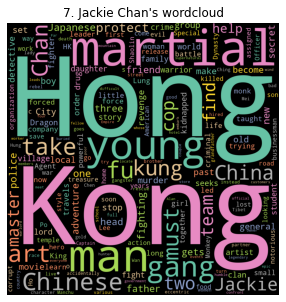

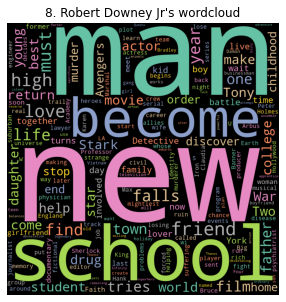

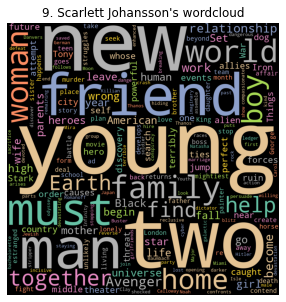

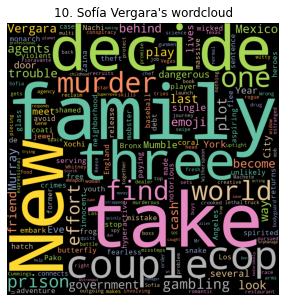

In [44]:
path = 'C:/Users/DL/PycharmProjects/3rd_sem/Data_Scraping/W11_Project_Demo_02/data/descr/' 
print_wordclouds(path)